In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('Steel_industry_data.csv')

In [2]:
data.date = pd.to_datetime(data.date, format = '%d/%m/%Y %H:%M')

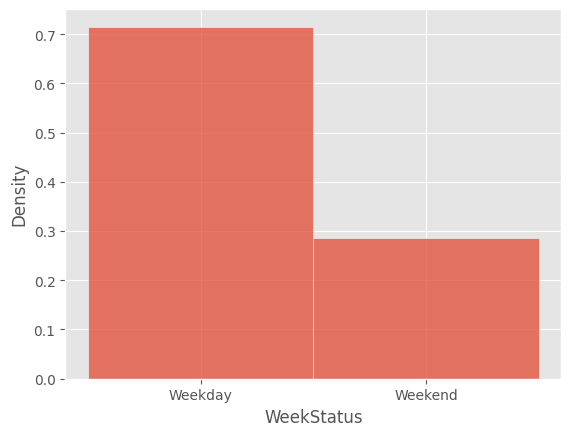

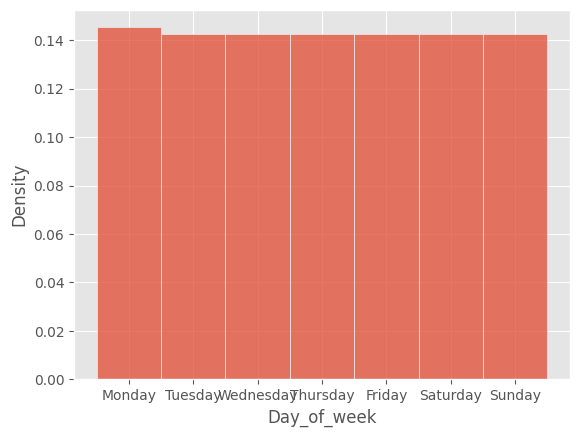

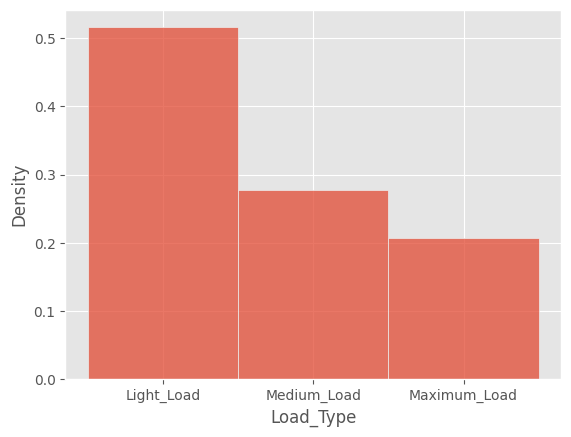

In [3]:
for i in ['WeekStatus', 'Day_of_week', 'Load_Type']:
    plt.figure(i)
    sns.histplot(data[i],stat="density")
    plt.show()

In [4]:
dfm = data.copy()

In [5]:
dfm = pd.get_dummies(dfm, columns=dfm.columns[-3:], drop_first=True,  dtype=float)

In [6]:
dfm = dfm.set_index('date')

In [7]:
dfm

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X = np.array([group[1] for group in dfm[dfm.columns[1:]].groupby(dfm[dfm.columns[1:]].index.date)])
Y =  np.array([group[1] for group in dfm[dfm.columns[0]].groupby(dfm[dfm.columns[0]].index.date)])

In [9]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_flat = X_train.reshape(-1, 15)
X_test_flat = X_test.reshape(-1, 15)


X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Возвращение данных к исходной форме
X_train = X_train_scaled.reshape(X_train.shape)
X_test = X_test_scaled.reshape(X_test.shape)


In [11]:
X_train[:32].shape

(32, 96, 15)

In [12]:
from main_cl import RNN, LSTM

rnn =  RNN(input_size=15, output_size=1,  hidden_size=64)

In [13]:
it = rnn.train(X_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1), epochs=100, batch_size=2)

Epoch 1/100, Сompute_loss: 0.02651064420868034:   1%|          | 1/100 [00:01<02:23,  1.45s/it]


KeyboardInterrupt: 

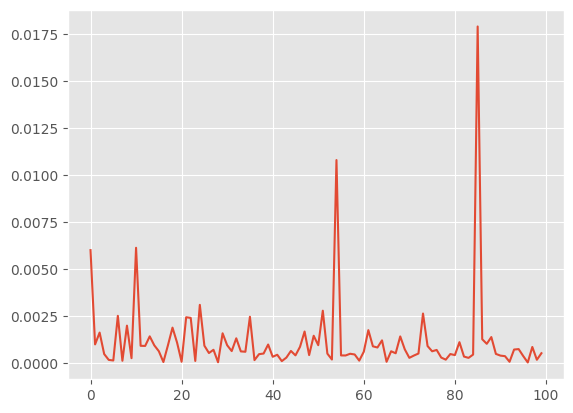

In [99]:
plt.plot(it)

In [100]:
y_pred.shape

(10560,)

In [106]:
y_pred = rnn.forward(X_test)
y_pred = y_pred.reshape(y_pred.shape[0] * y_pred.shape[1])

In [107]:
y_test_ = y_test.reshape(y_test.shape[0] * y_test.shape[1])

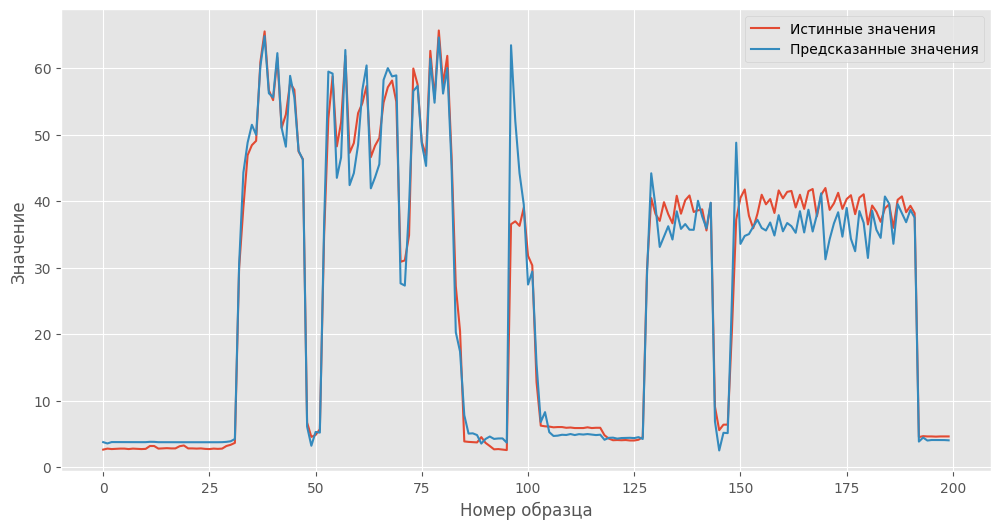

In [104]:
# Визуализация реальных и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(y_test_[:200], label='Истинные значения')
plt.plot(y_pred[:200], label='Предсказанные значения')
plt.xlabel('Номер образца')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test_, y_pred)

NameError: name 'y_test_' is not defined

In [12]:
X_train.shape

(255, 96, 15)

In [13]:
from main_cl import RNN, LSTM
lst = LSTM(input_size=15, output_size=1,  hidden_size=64)
it = lst.forward(X_train[:32])

ValueError: could not broadcast input array from shape (32,64) into shape (64,)

In [15]:
it.shape

(32, 96, 1)